In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

sns.set_theme()

df = pd.read_csv("fires.csv")

type = {"FIRE_CODE" : "str", "FIRE_NAME" : "str", "STATE" : "str"} #mixed type management

# deletion on unrelevent column
df = df.astype(type)
df = df.drop(["FOD_ID",
              "FPA_ID",
              "SOURCE_SYSTEM_TYPE",
              "SOURCE_SYSTEM",
              "NWCG_REPORTING_AGENCY",
              "NWCG_REPORTING_UNIT_ID",
              "NWCG_REPORTING_UNIT_NAME",
              "SOURCE_REPORTING_UNIT",
              "SOURCE_REPORTING_UNIT_NAME",
              "LOCAL_FIRE_REPORT_ID",
              "LOCAL_INCIDENT_ID",
              "FIRE_CODE",
              "ICS_209_INCIDENT_NUMBER",
              "ICS_209_NAME",
              "MTBS_ID",
              "MTBS_FIRE_NAME",
              "COMPLEX_NAME",
              "OWNER_CODE",
              "OWNER_DESCR",
              "Shape"], axis=1)
df.head()

/home/coin/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (8,10,11,12,13,14,15,16,17,18,35,37) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,OBJECTID,FIRE_NAME,FIRE_YEAR,DISCOVERY_DATE,DISCOVERY_DOY,DISCOVERY_TIME,STAT_CAUSE_CODE,STAT_CAUSE_DESCR,CONT_DATE,CONT_DOY,CONT_TIME,FIRE_SIZE,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,STATE,COUNTY,FIPS_CODE,FIPS_NAME
0,1,FOUNTAIN,2005,2453403.5,33,1300.0,9.0,Miscellaneous,2453403.5,33.0,1730.0,0.10,A,40.036944,-121.005833,CA,63.0,63.0,Plumas
1,2,PIGEON,2004,2453137.5,133,845.0,1.0,Lightning,2453137.5,133.0,1530.0,0.25,A,38.933056,-120.404444,CA,61.0,61.0,Placer
2,3,SLACK,2004,2453156.5,152,1921.0,5.0,Debris Burning,2453156.5,152.0,2024.0,0.10,A,38.984167,-120.735556,CA,17.0,17.0,El Dorado
3,4,DEER,2004,2453184.5,180,1600.0,1.0,Lightning,2453189.5,185.0,1400.0,0.10,A,38.559167,-119.913333,CA,3.0,3.0,Alpine
4,5,STEVENOT,2004,2453184.5,180,1600.0,1.0,Lightning,2453189.5,185.0,1200.0,0.10,A,38.559167,-119.933056,CA,3.0,3.0,Alpine


In [2]:
#info table creation
df_info = pd.DataFrame(columns= ["column_name", "var_type", "na_rate"])
df_info

,column_name,var_type,na_rate


### Data_info colums
- column_name = name of the colum in the data set
- var_type = data type
- na_rate = rate of nan

## Adding column name

In [3]:
df_info["column_name"] = df.columns
df_info

,column_name,var_type,na_rate
0,OBJECTID,NaN,NaN
1,FIRE_NAME,NaN,NaN
2,FIRE_YEAR,NaN,NaN
3,DISCOVERY_DATE,NaN,NaN
4,DISCOVERY_DOY,NaN,NaN
5,DISCOVERY_TIME,NaN,NaN
6,STAT_CAUSE_CODE,NaN,NaN
7,STAT_CAUSE_DESCR,NaN,NaN
8,CONT_DATE,NaN,NaN
9,CONT_DOY,NaN,NaN


## Adding Na Rate

In [4]:
df_info['na_rate'] = df.isna().sum(axis=0).reset_index(drop=True)/df.shape[0]
df_info

,column_name,var_type,na_rate
0,OBJECTID,NaN,0.000000
1,FIRE_NAME,NaN,0.000000
2,FIRE_YEAR,NaN,0.000000
3,DISCOVERY_DATE,NaN,0.000000
4,DISCOVERY_DOY,NaN,0.000000
5,DISCOVERY_TIME,NaN,0.469372
6,STAT_CAUSE_CODE,NaN,0.000000
7,STAT_CAUSE_DESCR,NaN,0.000000
8,CONT_DATE,NaN,0.474101
9,CONT_DOY,NaN,0.474101


## Adding var type

In [5]:
df_info["var_type"] = df.dtypes.reset_index(drop=True)
df_info

,column_name,var_type,na_rate
0,OBJECTID,int64,0.000000
1,FIRE_NAME,object,0.000000
2,FIRE_YEAR,int64,0.000000
3,DISCOVERY_DATE,float64,0.000000
4,DISCOVERY_DOY,int64,0.000000
5,DISCOVERY_TIME,float64,0.469372
6,STAT_CAUSE_CODE,float64,0.000000
7,STAT_CAUSE_DESCR,object,0.000000
8,CONT_DATE,float64,0.474101
9,CONT_DOY,float64,0.474101


## Studying var categories

In [32]:
for column in df.columns:
    print('###', column, '###')
    print(df[column].value_counts())

### OBJECTID ###
1          1
1253654    1
1253652    1
1253651    1
1253650    1
          ..
626819     1
626818     1
626817     1
626816     1
1880465    1
Name: OBJECTID, Length: 1880465, dtype: int64
### FIRE_NAME ###
nan                          960479
GRASS FIRE                     3983
UNKNOWN                        3154
LOCAL                          2068
STATE                          1423
                              ...  
EAST GARGUS FIRE                  1
BURNING DOG FIRE                  1
MCIVEN FIRE                       1
MOONS CHAPEL RD FIRE              1
BARKER BL  BIG_BEAR_LAKE_         1
Name: FIRE_NAME, Length: 493631, dtype: int64
### FIRE_YEAR ###
2006    114004
2000     96416
2007     95573
2011     90552
1999     89363
2005     88604
2001     86587
2008     85378
2010     79889
2009     78325
1994     75955
2002     75656
1996     75574
2015     74491
2012     72769
1995     71472
2004     69279
1998     68370
2003     68261
1992     67975
2014     67753
2

## Balance

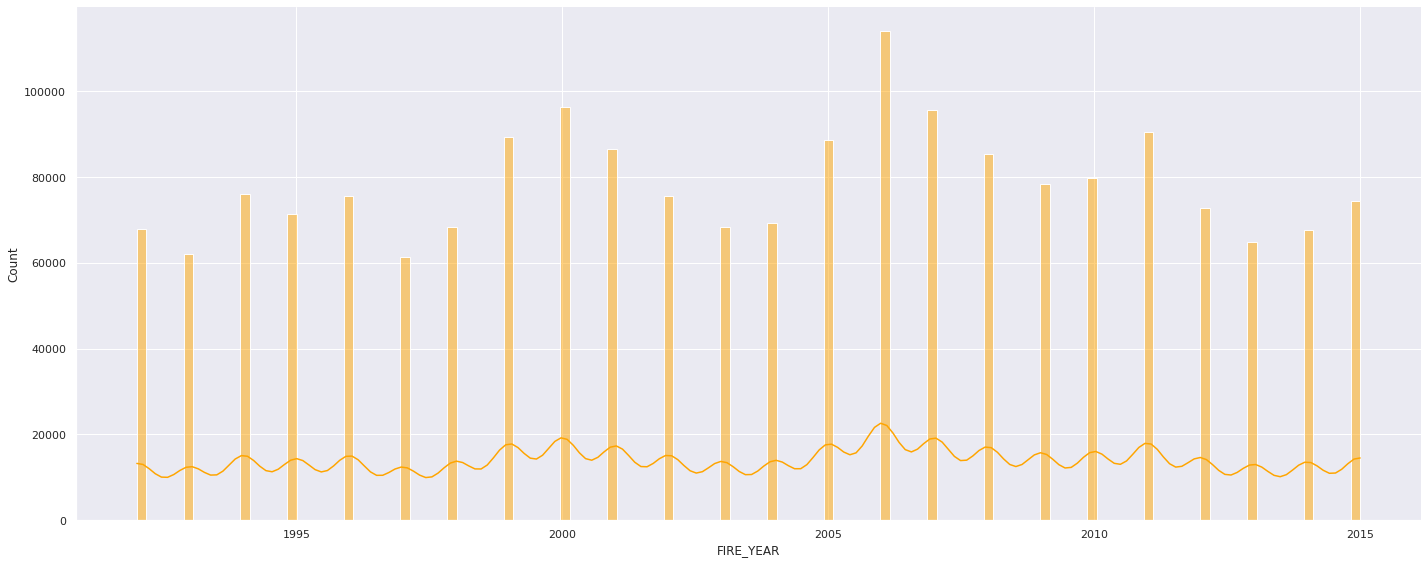

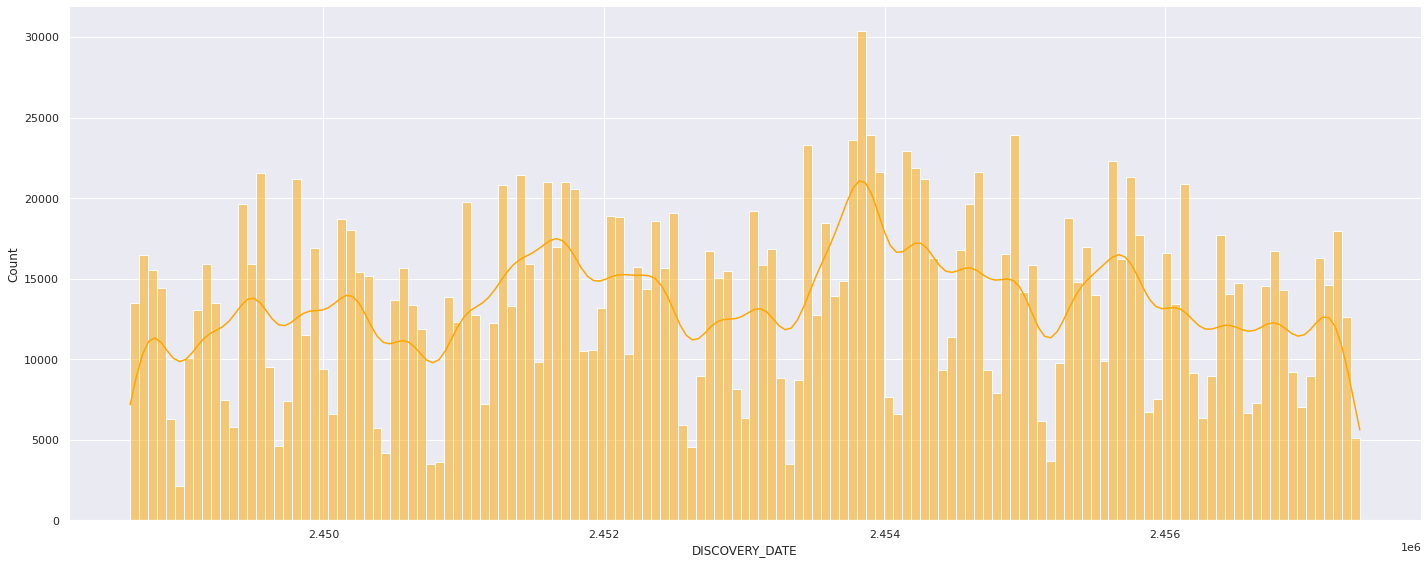

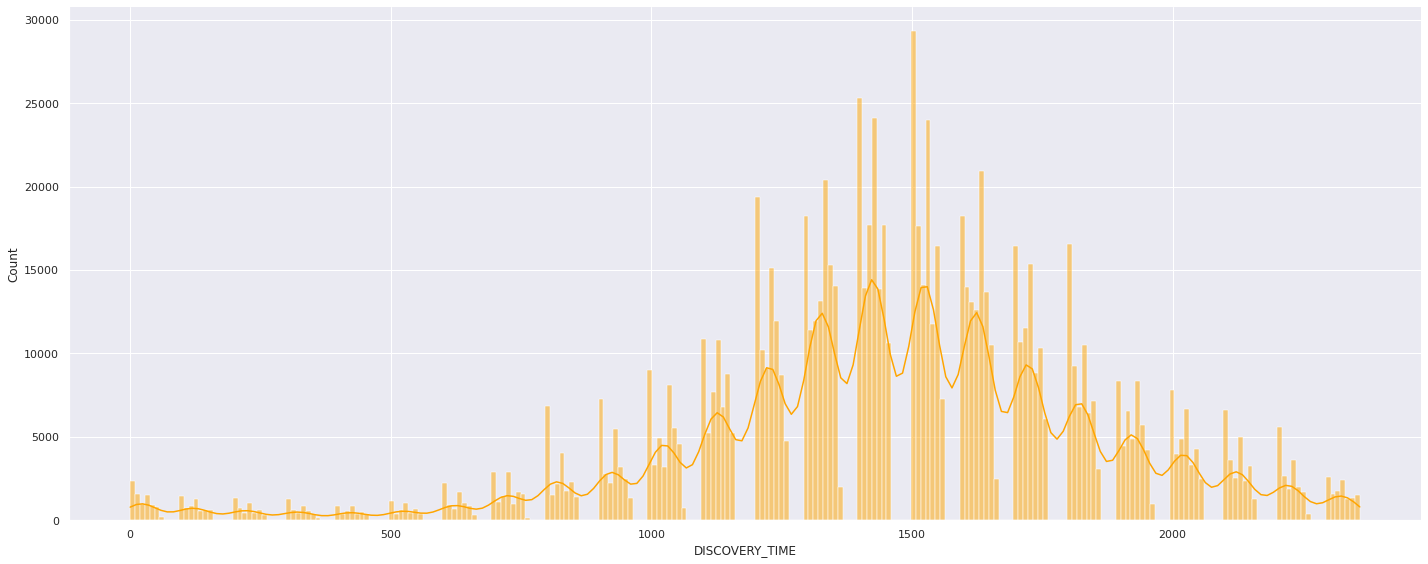

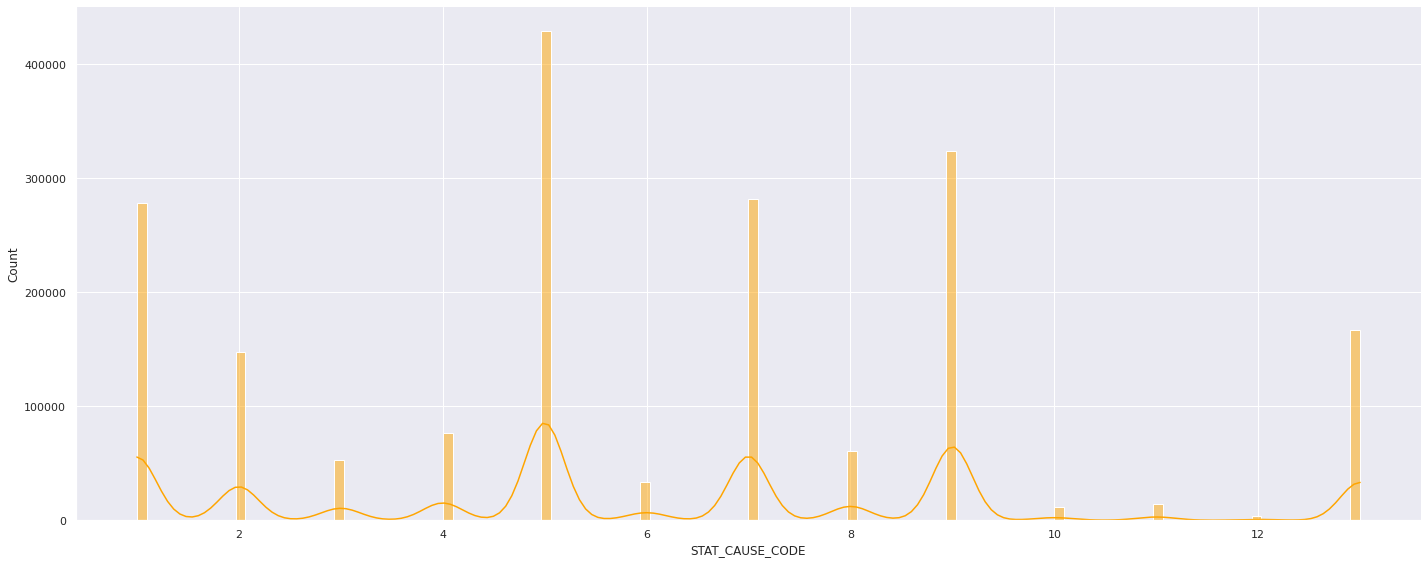

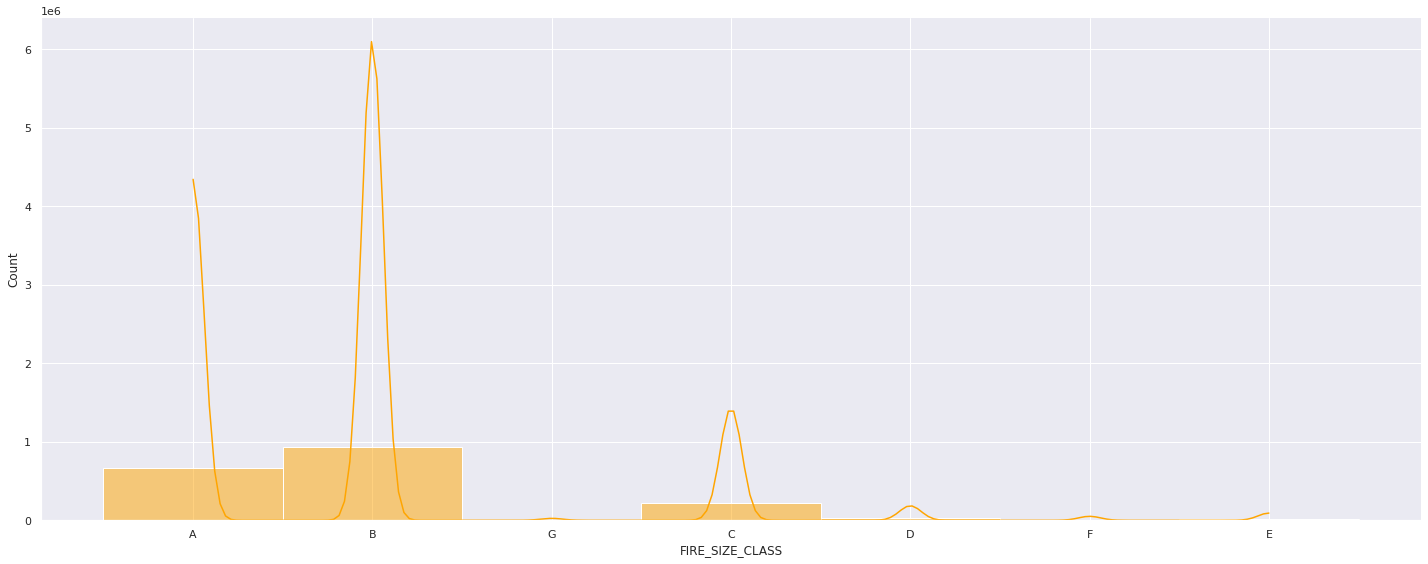

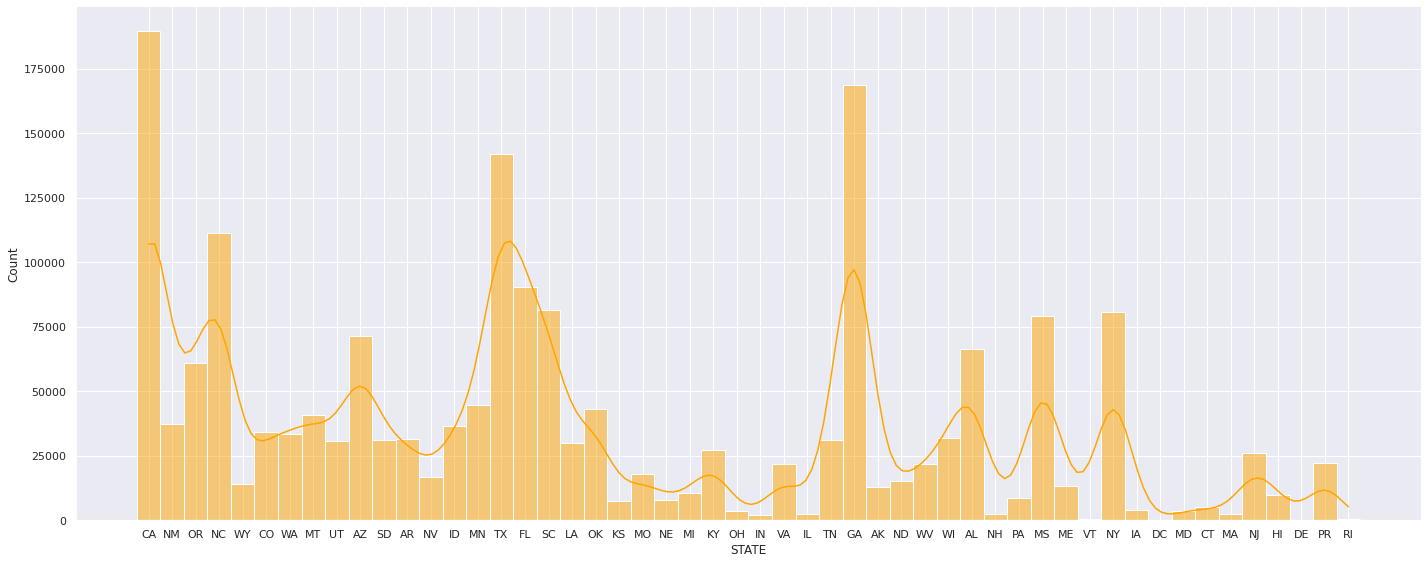

In [23]:
for column in df[['FIRE_YEAR', 'DISCOVERY_DATE', 'DISCOVERY_TIME', 'STAT_CAUSE_CODE', 'FIRE_SIZE_CLASS', 'STATE']].columns:
    sns.displot(df[column].dropna(), kde='True', color='orange', height=8, aspect=2.5);

## Correlation

<AxesSubplot:>

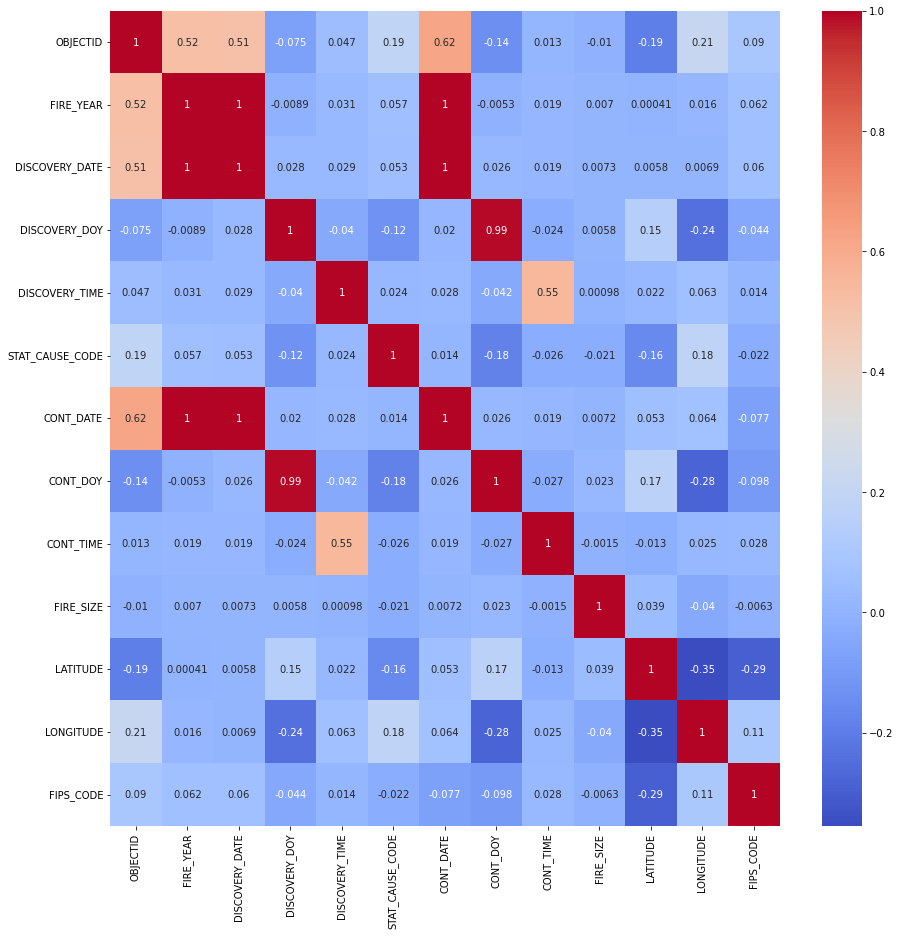

In [9]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")